# 의사결정나무(Decision Tree)
---
**의사결정나무**(Decision Tree): 일련의 질문에 대한 결정을 통해 데이터를 분해하는 모델
1. 트리의 루트에서 시작해서 <U>정보 이득(IG)</U>이 최대가 되는 특성으로 데이터를 나눔
2. 반복 과정을 통해 리프 노드가 순수해질 때까지 모든 자식 노드에서 이 분할 작업을 반복<br>
이때, 트리의 최대 깊이를 제한하여 트리를 <U>가지치기</U>함

**불순도 지표(또는 분할 조건)**
1. 지니 불순도($I_{G}$)
2. 엔트로피($I_{H}$)
3. 분류 오차($I_{E}$)

# 다중 분류(Multiclass Classification) 실습
---
**데이터셋**: iris(붓꽃 데이터셋)
- Iris-setosa, Iris-versicolor, Iris-virginica 세 종류 150개의 붓꽃 샘플

**다중 분류**(Multiclass Classification)

**의사결정나무**(Decision Tree)

### 필요한 라이브러리 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import myutils as my

### 데이터 준비 & 전처리

In [ ]:
# !gdown https://raw.githubusercontent.com/devdio/datasets/main/iris.csv

In [ ]:
X_train, X_test, y_train, y_test = my.get_iris()
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


In [ ]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

### 학습
- `DecisionTreeClassifier`이므로 <U>표준화하지 않고</U> 학습

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### 평가

In [ ]:
clf.score(X_train, y_train)

1.0

### 베스트 모델 찾기
- **하이퍼파라미터 최적화**: 그리드 서치(GridSearchCV)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'min_samples_leaf': range(1, 10), 
    'max_depth': range(3, 10), 
    'min_samples_split': range(3, 10)
}

clf = DecisionTreeClassifier(random_state=42)

gs = GridSearchCV(clf, params, cv=3, n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 441 candidates, totalling 1323 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(3, 10)},
             verbose=1)

In [ ]:
gs.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_split=3, random_state=42)

In [ ]:
gs.best_score_

0.9499999999999998

In [ ]:
gs.best_params_

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3}

### 학습

In [ ]:
clf = DecisionTreeClassifier(max_depth=3, 
                             min_samples_leaf=1, 
                             min_samples_split=3, 
                             random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=3, random_state=42)

- **의사결정나무 시각화**

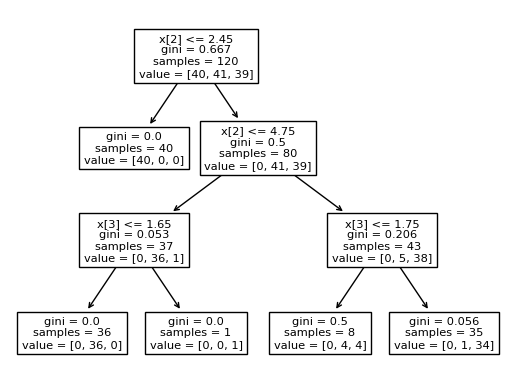

In [ ]:
from sklearn.tree import plot_tree

plot_tree(clf)
plt.show()

### 예측

In [ ]:
y_pred = clf.predict(X_test)

- **성능 평가**

In [ ]:
my.print_score(y_test, y_pred, average='macro')

accuracy: 1.0
precision: 1.0
recall: 1.0


- **혼동 행렬**(confusion matrix)

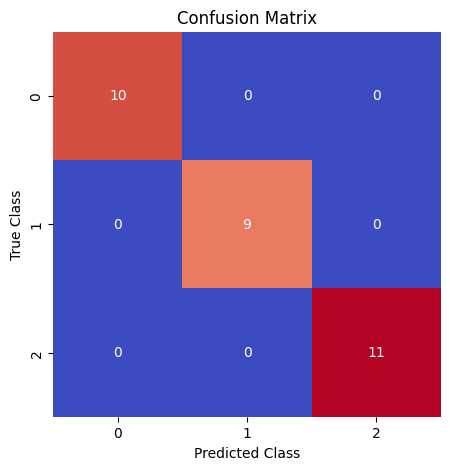

In [ ]:
my.plot_confusion_matrix(y_test, y_pred)